# CatDog Classification with CNN

In [1]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [3]:
classifier = Sequential()

In [4]:
# Convolution
classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())

In [5]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))


In [6]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, 5, 5, activation = 'relu',kernel_regularizer=l2(l2=0.01)))
# classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

In [7]:
# Flattening
classifier.add(Flatten())

In [24]:
# Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(1, activation = 'sigmoid'))

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 51, 51, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 64)          0

In [26]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
# To generate more images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [30]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN_Project/data/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN_Project/data/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 20 images belonging to 2 classes.


In [18]:
! pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from livelossplot import PlotLossesKerasTF

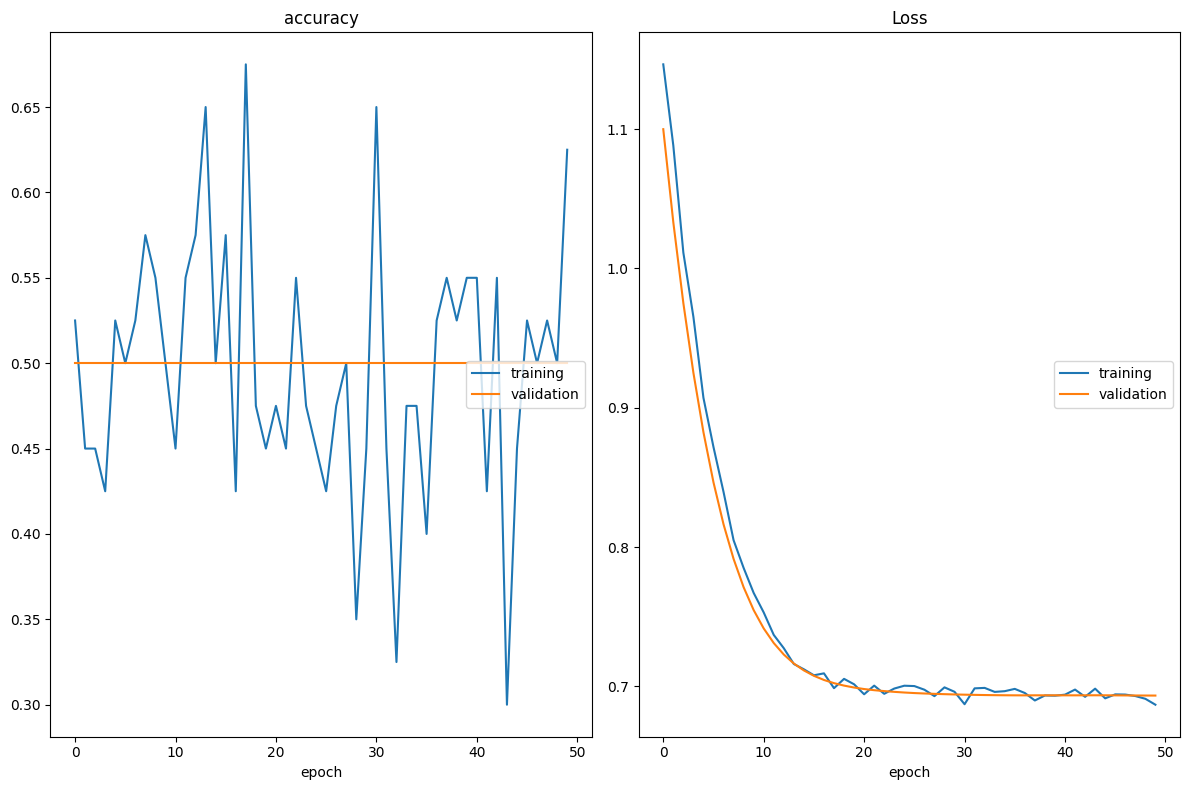

accuracy
	training         	 (min:    0.300, max:    0.675, cur:    0.625)
	validation       	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	training         	 (min:    0.687, max:    1.146, cur:    0.687)
	validation       	 (min:    0.693, max:    1.100, cur:    0.693)
3/3 [==============================] - 1s 583ms/step - loss: 0.6868 - accuracy: 0.6250 - val_loss: 0.6934 - val_accuracy: 0.5000


In [34]:
classifier.fit(training_set,epochs=50,validation_data = test_set,callbacks=[PlotLossesKerasTF()])


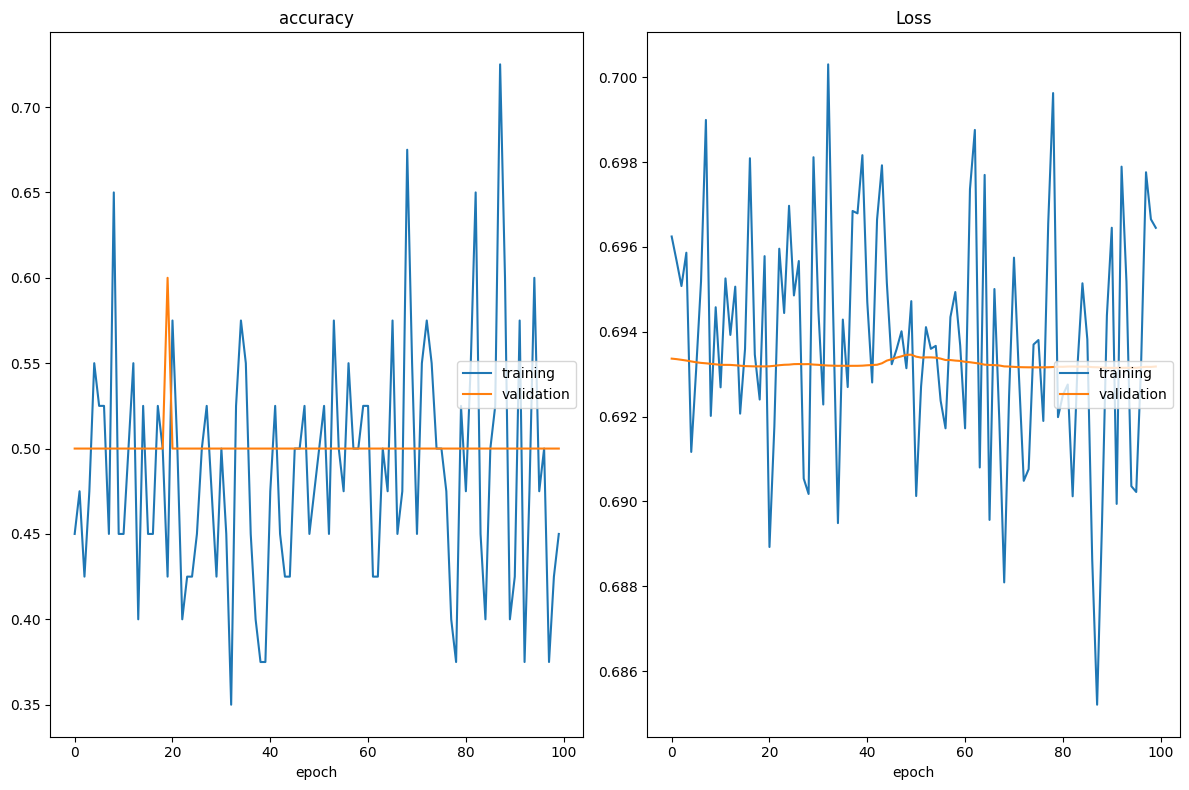

accuracy
	training         	 (min:    0.350, max:    0.725, cur:    0.450)
	validation       	 (min:    0.500, max:    0.600, cur:    0.500)
Loss
	training         	 (min:    0.685, max:    0.700, cur:    0.696)
	validation       	 (min:    0.693, max:    0.693, cur:    0.693)
3/3 [==============================] - 1s 492ms/step - loss: 0.6965 - accuracy: 0.4500 - val_loss: 0.6932 - val_accuracy: 0.5000


In [40]:
classifier.fit(training_set,epochs=100,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

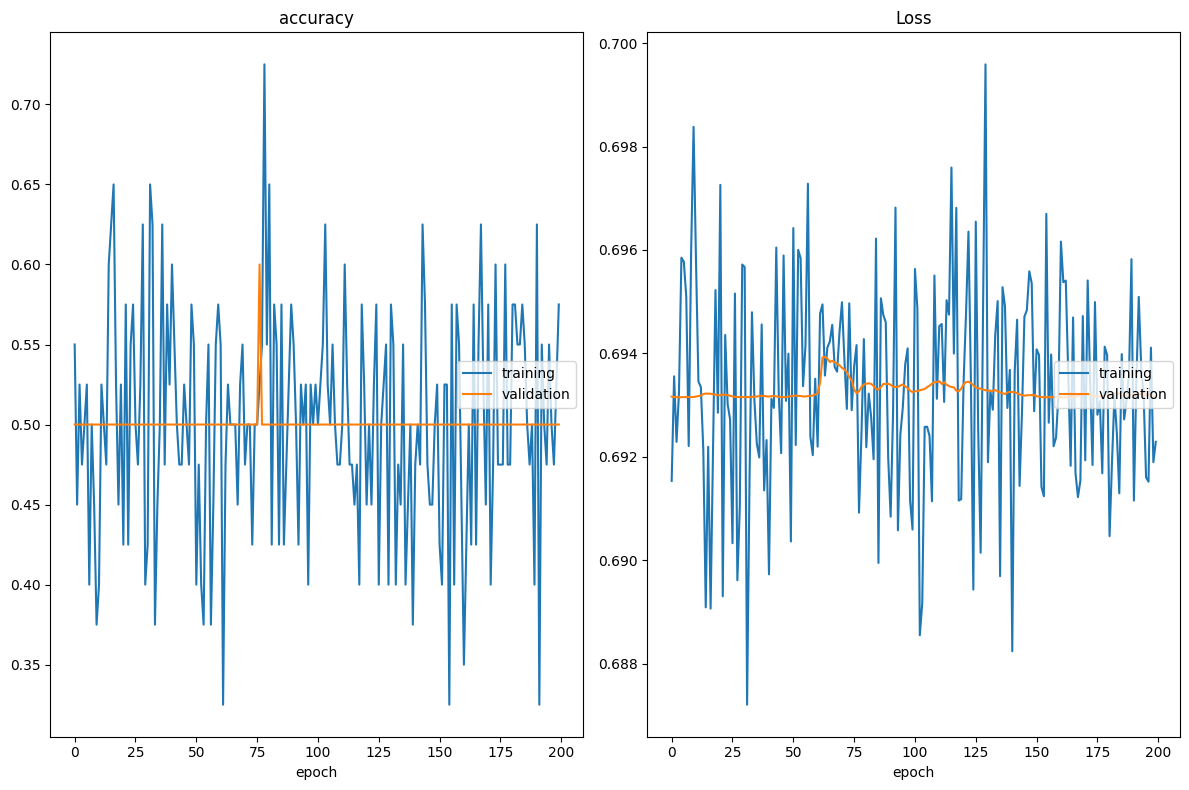

accuracy
	training         	 (min:    0.325, max:    0.725, cur:    0.575)
	validation       	 (min:    0.500, max:    0.600, cur:    0.500)
Loss
	training         	 (min:    0.687, max:    0.700, cur:    0.692)
	validation       	 (min:    0.693, max:    0.694, cur:    0.693)
3/3 [==============================] - 2s 754ms/step - loss: 0.6923 - accuracy: 0.5750 - val_loss: 0.6932 - val_accuracy: 0.5000


In [41]:
classifier.fit(training_set,epochs=200,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

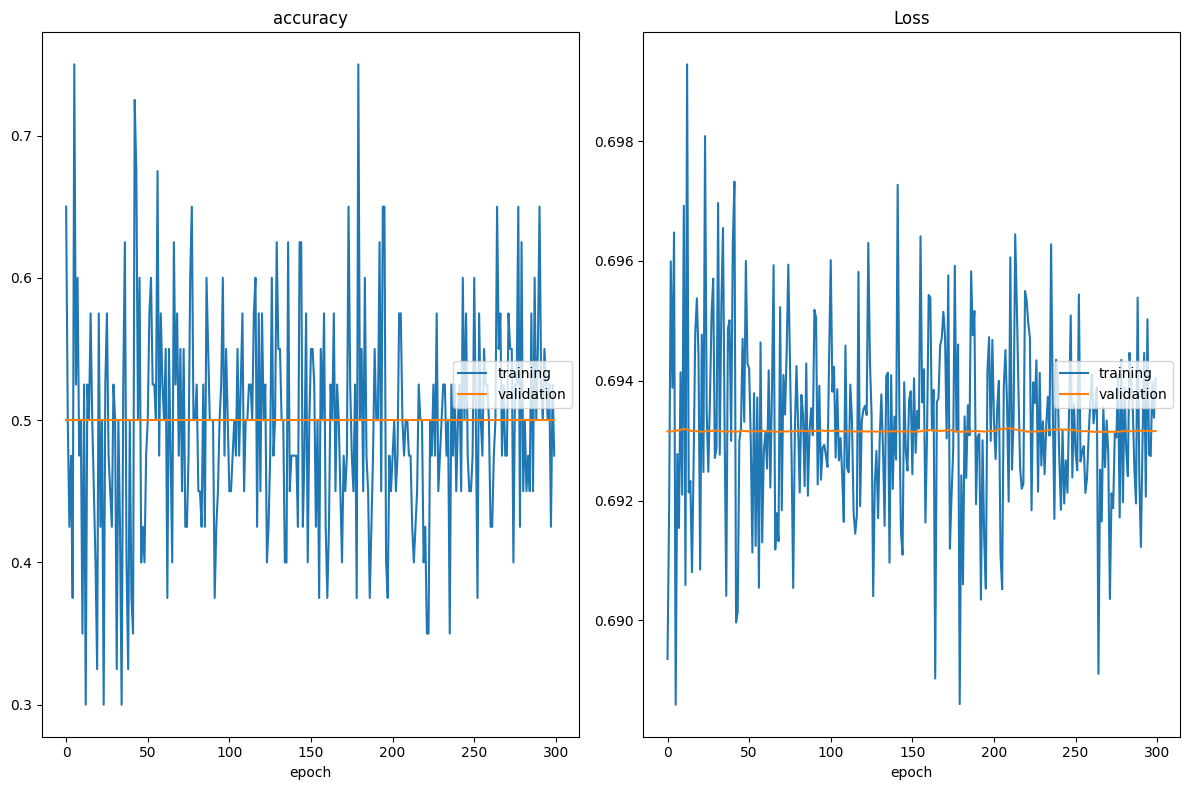

accuracy
	training         	 (min:    0.300, max:    0.750, cur:    0.475)
	validation       	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	training         	 (min:    0.689, max:    0.699, cur:    0.694)
	validation       	 (min:    0.693, max:    0.693, cur:    0.693)
3/3 [==============================] - 1s 492ms/step - loss: 0.6940 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000


In [42]:
classifier.fit(training_set,epochs=300,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

In [43]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/CNN_Project/data/train/dogs/8.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'dogs'
    print('Result is',result[0][0])
else:
    prediction = 'cats'
    print('Result is',result[0][0])
    
print(prediction)

1/1 [==============================] - 0s 34ms/step
Result is 0.50249976
dogs


In [44]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN_Project/data/train/cats/11.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>=0.5:
    prediction= 'dogs'
    print('Result is',result[0][0])
else:
    prediction = 'cats'
    print('Result is',result[0][0])
    
print(prediction)

1/1 [==============================] - 0s 27ms/step
Result is 0.5024998
dogs
